In [81]:
import pandas as pd
import numpy as np

In [82]:
glass=pd.read_csv(r"C:\data\data science\Study material\KNN\Datasets_KNN\glass.csv")

In [83]:
glass.info()
glass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [84]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [85]:
d1=glass.duplicated()
d1.sum()

1

In [86]:
glass1=glass.drop_duplicates()
glass1
glass1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [87]:
#normalization function
def nor_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [88]:
#normalizing the given data set
glass1_n=nor_func(glass1.iloc[:, 0:9])

In [89]:
glass1_n.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.315968,0.402118,0.596704,0.361210,0.508048,0.080334,0.327517,0.055831,0.112308
std,0.133142,0.122806,0.321535,0.154494,0.138214,0.105183,0.132517,0.158173,0.191352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235733,0.326316,0.465479,0.280374,0.441071,0.020934,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.090177,0.294610,0.000000,0.000000
75%,0.351185,0.463158,0.801782,0.417445,0.585714,0.098229,0.345725,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
x = np.array(glass1_n.iloc[:,:])

y = np.array(glass1['Type'])

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier(n_neighbors=15)

In [101]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [103]:
pred=knn.predict(x_test)
pred

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 7, 2, 2, 7, 1, 1, 1, 1, 1, 1, 2, 5,
       2, 1, 7, 2, 1, 2, 2, 1, 2, 1, 7, 7, 2, 2, 1, 1, 2, 1, 1, 1, 7],
      dtype=int64)

In [105]:
#evaluate the model
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test,pred))
pd.crosstab(y_test,pred,rownames=['actual'],colnames=['predections'])

0.7209302325581395


predections,1,2,5,7
actual,,,,
1,11,3,0,0
2,5,13,0,0
3,1,0,0,0
5,0,0,1,0
6,1,1,0,0
7,1,0,0,6


In [109]:
#error on train data
pred_train = knn.predict(x_train)
print(accuracy_score(y_train, pred_train))
pd.crosstab(y_train, pred_train, rownames=['actual'], colnames = ['predictions']) 

0.6705882352941176


predictions,1,2,5,6,7
actual,,,,,
1,51,4,0,0,0
2,12,44,1,1,0
3,13,3,0,0,0
5,1,5,2,0,4
6,3,1,0,0,3
7,1,2,1,1,17


In [110]:
#creating empty list variable
acc=[]

In [111]:
#running KNN algorithm for 3 to 50 nearest neighbours (odd numbers)
# and storing the accuracy values

In [112]:
for i in range (3,50,2):
    neigh=KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    train_acc=np.mean(neigh.predict(x_train)==y_train)
    test_acc=np.mean(neigh.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])

In [113]:
import matplotlib.pyplot as plt

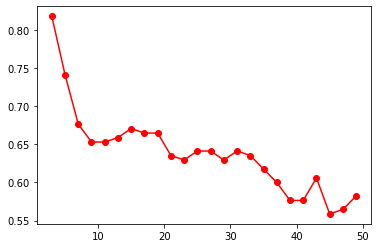

In [114]:
#train accaccuracy plot
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

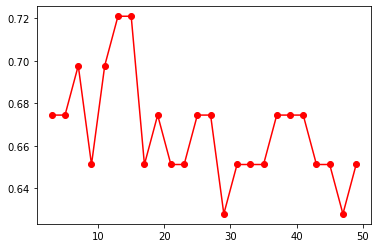

In [117]:
#test accaccuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")